*Data Science Course - Telkom Digital Talent Incubator*


---




# **Regression**
Regresi linier (Linier Regression) adalah salah satu teknik analisis statistik yang digunakan untuk mengestimasi hubungan fungsional di antara dua atau lebih variabel, yaitu antara variabel terikat (dependen; respon; Y) dengan satu atau lebih variabel bebas (independen variable, predictor, X). Apabila kita hanya menggunakan satu variabel bebas untuk memprediksi respons, disebut sebagai regresi linier sederhana (simple linier regression), sedangkan apabila terdapat lebih dari 1 variabel bebas, disebut sebagai regresi linier berganda (multiple linear regression).

Pada script ini akan membahas mengenai multiple linear reggression, dataset yang akan digunakan yaitu mengenai penjualan pie pada durasi 15 minggu. Berikut ini variabel yang akan digunakan :

1. Week > hanya menunjukan urutan minggu (drop)
2. pie_sales (variabel dependen / y)
3. price (variabel independen/ x1)
4. advertising (variabel independen/ x2)

# **Multiple Linear Regression**





In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Import Dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/amaliaristantya/Digital_Talent_Incubator/main/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


In [6]:
df_pie.shape

(15, 4)

Berdasarkan pada tabel dan keterangan, dataframe mempunyai 15 row dan 4 kolom 

# **Explore Dataset** 

Mengidentifikasikan hubungan antar variabel pada dataset 

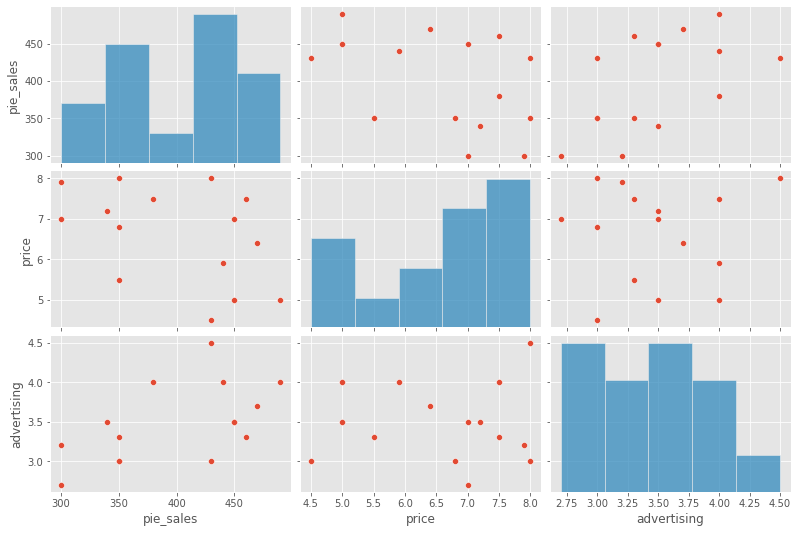

In [7]:
sns.pairplot(df_pie.drop('week', axis=1), aspect=1.5)
plt.show()

Pada grafik diatas dapat kita simpulkan bahwa price dan advertising mempunyai hubungan dengan pie sales. maka pie sales disini kita anggap sebagai variabel dependen/ y. Sedangkan price dan advertising dianggap sebagai variabel independen/ x


Jika kita cermati pada scatter plot maka juga dapat ditarik kesimpulan bahwa :
1. advertising dan pie_sales mempunyai hubungan positif, dengan kata lain jika semakin tinggi advertising maka salesn juga akan meningkat
2. price dan pie_sales mempunyai hubungan negative, dengan kata lain jika semakin tinggi price maka sales akan semakin turun

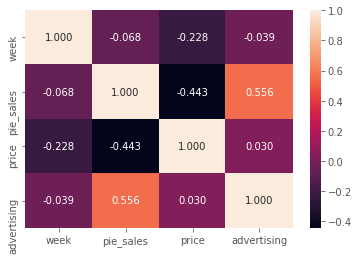

In [8]:
# Calculate correlations
corr = df_pie.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".3f")

Berdasarkan heatmap, maka pie sales dan price mempunyai korelasi yang negatif yaitu (-0.443). Sedangkan pie sales dan advertising mempunyai korelasi positif yaitu (0.556). Hal tersebut telah sesuai dengan analisa kita pada scatter plot sebelumnya. terlihat juga bahwa korelasi advertising dan price yaitu (0.03) yang berarti tidak mempunyai hubungan kuat, sehingga dapat dijadikan variabel independen.

# **Regression using Sklearn**

Dalam perhitungan kali ini akan menggunakan Scikit-Learn, salah satu library python yang sangat populer untuk Machine Learning. 

Sesuai dengan hasil explore dataset, maka tentukan variabel x dan y untuk pemodelan.

In [9]:
X = df_pie[['price','advertising']]    
Y = df_pie['pie_sales']  

In [10]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Selanjutnya kita akan mencari tahu hasil intercept dan coefisien pada dataframe kita. namun sebelum itu kita harus paham mengenai formula dari multiple linear reggresion. Berikut ini merupakan formula tersebut :

**Y = b0 + b1X1 + b2X2+ …… + bnXn**


Ket :
*   Y = value yang ingin diprediksi / variabel dependen
*   b0 = nilai intercept y
*   b1 = coeficient x1
*   x1 = variabel independen ke-1
*   b2 = coeficient x2
*   x2 = variabel independen ke-2








In [11]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


Berdasarkan hasil, maka diperoleh persamaan berikut sesuai dengan formula :

**pie_sales = 306.526 - 24.975 (price) + 74.130 (advertising)**



In [12]:
# prediction with sklearn    
New_price = 9.0
New_advertising = 5.0  
print ('Predicted pie_sales: \n', regr.predict([[New_price ,New_advertising]]))

Predicted pie_sales: 
 [452.40517507]


Dengan menggunakan contoh price = 9.0 dan advertising 5.0 maka dapat diprediksi bahwa hasil pie sales yaitu 452.405. Kita dapat melakukan prediksi lain hanya dengan mengganti input variabel

# **Visualization and determine R-Square**

Pada bagian ini kita akan melakukan visualisasi disertai dengan hasil R-square. Apa yang dimaksud R-Square ? R-square menunjukkan seberapa besar prosentase variasi variabel independen yang digunakan dalam model mampu menjelaskan variasi variabel dependen.

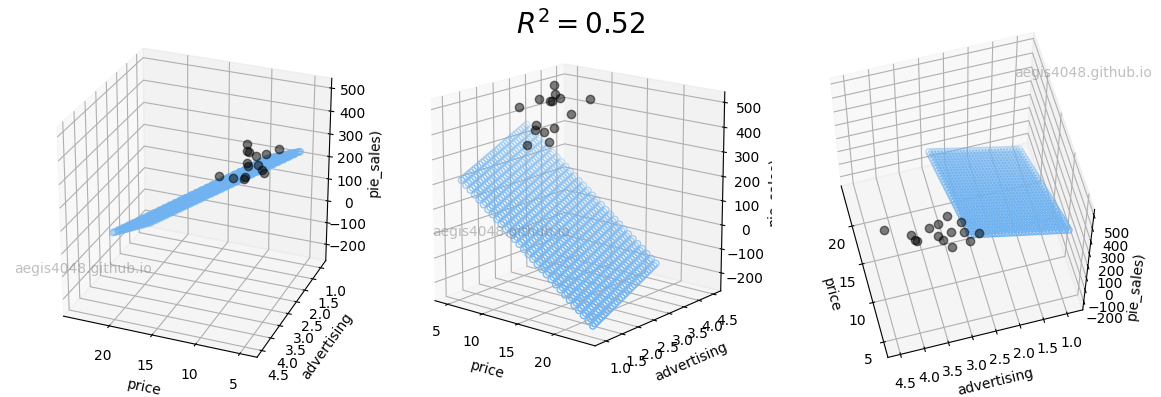

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

X = df_pie[['price', 'advertising']].values.reshape(-1,2)
Y = df_pie['pie_sales']

# Prepare model data point for visualization 

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Train 

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate 

r2 = model.score(X, Y)

# Plot 

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('price', fontsize=10)
    ax.set_ylabel('advertising', fontsize=10)
    ax.set_zlabel('pie_sales)', fontsize=10)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=10, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=10, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=10, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

*   R2 = 0, maka tidak ada hubungan apapun pada ketiga variabel
*   R2= 1 , maka menunjukan hubungan yang sempurna antar ketiga variabel
*   0>R2>1 , maka ada hubungan antar ketiga variabel, beberapa dipengaruhi dan beberapa lainnya tidak dipengaruhi, semakin tinggi semakin kuat

Pada pemodelan maka didapatkan R2=0.52 yang mana berarti sebanyak 52% variasi y dipengaruhi oleh variabel x, sedangan 48% sisanya dipengaruhi oleh variabel lain (selain price dan advertising)





# **Regression using Statsmodels**

In [14]:
X = sm.add_constant(X) # adding a constant

In [15]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        14:43:19   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        306.5262    114.254      2.683      0.0

**Analisis OLS Model**

Jumlah sample (n) = 15 

Jumlah variabel independen (k) = 3

df1 = 3-1 = 2

df2 = 15-3-1 = 12

---
**Analisis R-Square / R2**

R2=0.52 yang mana berarti sebanyak 52% variasi y dipengaruhi oleh variabel x, sedangan 48% sisanya dipengaruhi oleh variabel lain (selain price dan advertising yang tidak ada dalam data *ini*)


---
**Analisis Uji F**

*Hipotesis*

- Ho : Tidak ada pengaruh secara signifikan antara price dan - advertising terhadap pie_sales

- Ha : Ada pengaruh secara signifikan antara price dan advertising terhadap pie_sales

*Kriteria pengujian*
- Ho diterima bila F statistik < F tabel
- Ho ditolak bila F statistik  > F tabel

Tingkat signifikan menggunakan a= 5%

F-Statistik  = 6.539

F-Tabel (2,12) = 3.89

F-statistik >  F-Tabel atau 6.539 > 3.39, maka ho ditolak dan ha diterima, jadi disimpulkan bahwa ada pengaruh secara signifikan antara price dan advertising terhadap pie sales



---
**Analsiis Uji-T**

**Variabel Price**

*Hipotesis*

- Ho : Secara parsial tidak ada pengaruh signifikan  antara price dan  terhadap pie_sales
- Ha : Secara parsial ada pengaruh signifikan antara price dan  terhadap pie_sales

*Kriteria Pengujian*
- Ho diterima jika -t tabel < t statistik < t tabel
- Ho ditolak jika -t statistik < -t tabel atau t statistik > t tabel

tingkat signifikan a/2 = 2.5% (uji 2 sisi)

T-Statistik = -2.306

T-table (12) = 0.695

t statistik > t tabel atau -2.306 > -0.695, maka tolak h0 dan terima ha, maka ada pengaruh signifikan antara price dan  terhadap pie_sales

**Variabel advertising**

*Hipotesis*

- Ho : Secara parsial tidak ada pengaruh signifikan  antara price dan  terhadap pie_sales
- Ha : Secara parsial ada pengaruh signifikan antara price dan  terhadap pie_sales

*Kriteria Pengujian*
- Ho diterima jika -t tabel < t statistik < t tabel
- Ho ditolak jika -t statistik < -t tabel atau t statistik > t tabel

tingkat signifikan a/2 = 2.5% (uji 2 sisi)

T-Statistik = 2.855

T-table (12) = 0.695

t statistik > t tabel atau 2.855 > 0.695, maka tolak h0 dan terima ha, maka ada pengaruh signifikan antara price dan  terhadap pie_sales

---

**Analisis P-Value**

p value = 0.020, 0.040, 0.014 < 0.05

maka terdapat batas toleransi yang bisa dimaklumi atau diterima, tidak terdapat bukti bahwa price dan advertising tidak perpengaruh terhadap pie_sales

---

**Analisis Durbin Waston**

- Deteksi Autokorelasi Positif:

Jika dw < dL maka terdapat autokorelasi positif,

Jika dw > dU maka tidak terdapat autokorelasi positif,

Jika dL < dw < dU maka pengujian tidak meyakinkan atau tidak dapat disimpulkan.

- Deteksi Autokorelasi Negatif:

Jika (4 – dw) < dL maka terdapat autokorelasi negatif,

Jika (4 – dw) > dU maka tidak terdapat autokorelasi negatif,

Jika dL < (4 – dw) < dU maka pengujian tidak meyakinkan atau tidak dapat disimpulkan

n= 15

k= 3

maka dalam tabel dubrin waston (15,3) 

dU = 1.7501

dL = 0.8140

4-dU = 2.2499

4-dL = 3.186

Nilai Durbin-Watson berdasarkan hasil tabel (dW) =1.683

**dL < dW < dU, maka pengujian tidak meyakinkan atau tidak dapat disimpulkan atau tidak terdapat autokorelasi.**







